In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
censusFile = '../nuts/census_2011_nuts.csv'
minAge = 40
maxAge = 77

o = open('../nuts/age_restricted_census_nuts.csv', 'w')

with open(censusFile,'r') as f:
    header = f.readline().rstrip().split(',')
    ageCol = 0
    sexCol = 1
    timeCol = 3
    regions = ','.join(header[4:])
    o.write('age,' + regions + '\n')
    for line in f:
        stuff = line.rstrip().split(',')
        age = stuff[ageCol]
        sex = stuff[sexCol]
        age = age.replace('"Y','')
        if 'TOTAL' not in age and '-' not in age and '_' not in age:
            age = int(age)
            if age >= minAge and age <= maxAge and sex == 'T':
                o.write(str(age) + ',' + ','.join(stuff[4:]) + '\n')
                
o.close()           

In [3]:
censusPops = pd.read_csv('../nuts/age_restricted_census_nuts.csv')
censusPops.head(3)
regionCols = censusPops.columns.tolist()[1:]
regionCounts = {}
for region in regionCols:
    regionCounts[region] = np.sum(censusPops[region].values)

In [4]:
print(regionCounts['UK'])

27522315


In [5]:
NUTS3_counts = pd.read_csv('../00_csv_files/nuts3_POB_POR_counts.csv').sort_values(by='nuts3')
nuts3_regions = sorted(NUTS3_counts.nuts3.tolist())
NUTS3_counts.head(3)

,nuts3,POBcount,PORcount,census_pops,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area,density
0,UKC11,4673,6056,283640,127180,0.016475,0.021351,Hartlepool and Stockton-on-Tees,300534438,943.785351
1,UKC12,6318,6459,273590,121960,0.023100,0.023627,South Teesside,300272015,911.140520
2,UKC13,1475,2023,105565,47865,0.013982,0.019164,Darlington,193750791,544.849389


In [6]:
census_ukb_age = [regionCounts[n] for n in nuts3_regions]
NUTS3_counts['census_ukb_age'] = census_ukb_age
NUTS3_counts.head(3)

,nuts3,POBcount,PORcount,census_pops,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area,density
0,UKC11,4673,6056,283640,127180,0.016475,0.021351,Hartlepool and Stockton-on-Tees,300534438,943.785351
1,UKC12,6318,6459,273590,121960,0.023100,0.023627,South Teesside,300272015,911.140520
2,UKC13,1475,2023,105565,47865,0.013982,0.019164,Darlington,193750791,544.849389


In [8]:
NUTS3_counts.head(3)

,nuts3,POBcount,PORcount,census_pops,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area,density
0,UKC11,4673,6056,283640,127180,0.016475,0.021351,Hartlepool and Stockton-on-Tees,300534438,943.785351
1,UKC12,6318,6459,273590,121960,0.023100,0.023627,South Teesside,300272015,911.140520
2,UKC13,1475,2023,105565,47865,0.013982,0.019164,Darlington,193750791,544.849389


In [9]:
np.sum(NUTS3_counts.PORcount.values)

441936

In [10]:
cols = NUTS3_counts.columns.tolist()
colOrder = cols[:4] + [cols[-1]] + cols[4:-1]
print(colOrder)

['nuts3', 'POBcount', 'PORcount', 'census_pops', 'density', 'census_ukb_age', 'POB_sampled', 'POR_sampled', 'NUTS_NAME', 'area']


In [11]:
newOrder = NUTS3_counts[colOrder]
newOrder.head(3)

,nuts3,POBcount,PORcount,census_pops,density,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area
0,UKC11,4673,6056,283640,943.785351,127180,0.016475,0.021351,Hartlepool and Stockton-on-Tees,300534438
1,UKC12,6318,6459,273590,911.140520,121960,0.023100,0.023627,South Teesside,300272015
2,UKC13,1475,2023,105565,544.849389,47865,0.013982,0.019164,Darlington,193750791


In [12]:
newOrder.to_csv('../00_csv_files/nuts3_POB_POR_counts.csv',index=False)

In [13]:
NUTS3_counts = pd.read_csv('../00_csv_files/nuts3_POB_POR_counts.csv').sort_values(by='nuts3')
NUTS3_counts.head(3)

,nuts3,POBcount,PORcount,census_pops,density,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area
0,UKC11,4673,6056,283640,943.785351,127180,0.016475,0.021351,Hartlepool and Stockton-on-Tees,300534438
1,UKC12,6318,6459,273590,911.140520,121960,0.023100,0.023627,South Teesside,300272015
2,UKC13,1475,2023,105565,544.849389,47865,0.013982,0.019164,Darlington,193750791


In [17]:
pobCounts = dict(zip(NUTS3_counts.nuts3,NUTS3_counts.POBcount))
porCounts = dict(zip(NUTS3_counts.nuts3,NUTS3_counts.PORcount))
census_age = dict(zip(NUTS3_counts.nuts3,NUTS3_counts.census_ukb_age))
nutsRegions = sorted(NUTS3_counts.nuts3.tolist())

In [20]:
POBsampled = [float(pobCounts[n])/census_age[n] for n in nutsRegions]
PORsampled = [float(porCounts[n])/census_age[n] for n in nutsRegions]

In [22]:
NUTS3_counts['POBsampled_age'] = POBsampled
NUTS3_counts['PORsampled_age'] = PORsampled
NUTS3_counts.head(3)

,nuts3,POBcount,PORcount,census_pops,density,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area,POBsampled_age,PORsampled_age
0,UKC11,4673,6056,283640,943.785351,127180,0.016475,0.021351,Hartlepool and Stockton-on-Tees,300534438,0.036743,0.047618
1,UKC12,6318,6459,273590,911.140520,121960,0.023100,0.023627,South Teesside,300272015,0.051804,0.052960
2,UKC13,1475,2023,105565,544.849389,47865,0.013982,0.019164,Darlington,193750791,0.030816,0.042265


In [23]:
POB_average_sampled = np.mean(NUTS3_counts['POBsampled_age'])
POR_average_sampled = np.mean(NUTS3_counts['PORsampled_age'])
POB_log2_sampled_ratio = np.log2(NUTS3_counts['POBsampled_age']/POB_average_sampled)
POR_log2_sampled_ratio = np.log2(NUTS3_counts['PORsampled_age']/POR_average_sampled)

In [24]:
NUTS3_counts['POB_log2_sampled_ratio'] = POB_log2_sampled_ratio
NUTS3_counts['POR_log2_sampled_ratio'] = POR_log2_sampled_ratio

In [25]:
# save table with density and ratios
NUTS3_counts.to_csv('../00_csv_files/nuts3_POB_POR_counts.csv',index=False)

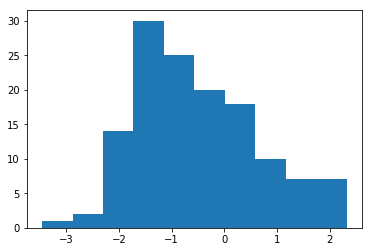

In [26]:
plt.hist(POB_log2_sampled_ratio)
plt.show()

In [30]:
NUTS3_counts.sort_values(by='POBsampled_age',ascending=False)

,nuts3,POBcount,PORcount,census_pops,density,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area,POBsampled_age,PORsampled_age,POB_log2_sampled_ratio,POR_log2_sampled_ratio
35,UKF14,8162,4728,305680,4124.773647,101890,0.026704,0.015467,Nottingham,74108309,0.080106,0.046403,2.322047,1.628314
18,UKD72,14742,7153,466415,4169.225122,184770,0.031633,0.015373,Liverpool,111870908,0.079786,0.038713,2.316266,1.366915
87,UKK11,12010,11794,428235,3884.262642,153440,0.028111,0.027616,"Bristol, City of",110248724,0.078272,0.076864,2.288626,2.356403
48,UKG23,7162,5736,249010,2655.639699,105060,0.028770,0.023035,Stoke-on-Trent,93766485,0.068171,0.054597,2.089286,1.862928
5,UKC22,21669,21234,829320,2047.236085,357925,0.026135,0.025611,Tyneside,405092508,0.060541,0.059325,1.918040,1.982744
27,UKE32,12966,13668,552700,1488.964116,219840,0.023463,0.024730,Sheffield,371197663,0.058979,0.062172,1.880344,2.050373
122,UKM34,12785,6762,593245,3385.397428,237755,0.021590,0.011451,Glasgow City,175236442,0.053774,0.028441,1.747041,0.922071
1,UKC12,6318,6459,273590,911.140520,121960,0.023100,0.023627,South Teesside,300272015,0.051804,0.052960,1.693196,1.818999
29,UKE42,14689,18564,751485,1361.234262,295700,0.019553,0.024703,Leeds,552061479,0.049675,0.062780,1.632667,2.064398
115,UKM25,8410,11537,476625,1803.269569,188755,0.017651,0.024206,"Edinburgh, City of",264311564,0.044555,0.061122,1.475727,2.025778
